In [1]:
import pandas as pd
import numpy as np

In [4]:
from datetime import datetime
from dateutil import parser

In [376]:
import seaborn as sns
sns.set(style="darkgrid")

In [56]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [354]:
lstm_data = pd.read_excel('./price sheet.xlsx' ,sheet_name='매매APT 증감률')

In [355]:
lstm_data = pd.DataFrame(lstm_data)

In [356]:
lstm_data = lstm_data.T.head(30)

In [357]:
lstm_data.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,NaN,Classification,86.1,2,3,4,5,6,7,8,9,10,11,12,87.1,2,3,4,5,6,7,8,9,10,11,12,88.1,2,3,4,5,6,7,8,9,10,11,12,89.1,2,3,4,5,6,7,8,9,10,11,12,90.1,2,3,4,5,6,7,8,9,10,11,12,91.1,2,3,4,5,6,7,8,9,10,11,12,92.1,2,3,4,5,6,7,8,9,10,11,12,93.1,2,3,4,5,6,7,8,9,10,11,12,94.1,2,3,4,5,6,7,8,9,10,11,12,95.1,2,3,4,5,6,7,8,9,10,11,12,96.1,2,3,4,5,6,7,8,9,10,11,12,97.1,2,3,4,5,6,7,8,9,10,11,12,98.1,2,3,4,5,6,7,8,9,10,11,12,99.1,2,3,4,5,6,7,8,9,10,11,12,2000.1,2,3,4,5,6,7,8,9,10,11,12,2001.1,2,3,4,5,6,7,8,9,10,11,12,2002.1,2,3,4,5,6,7,8,9,10,11,12,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
Unnamed: 1,전국,NaN,Total,NaN,0,-0.184162,-0.553506,-0.742115,-0.560748,-0.56391,-0.189036,0.189394,0,-0.94518,-0.763359,-0.192308,-0.385356,0,0,0.193424,0,0.3861,0.576923,4.2065,2.38532,1.6129,0.352734,2.10896,3.27022,3,2.10356,2.06022,1.08696,2.61137,3.59281,-0.722543,-0.291121,-1.31387,1.0355,2.63543,5.27817,3.65854,6.14379,0.985222,-0.365854,-0.979192,-0.123609,-0.123762,0.86741,0.4914,0.366748,1.46163,4.92197,3.43249,4.75664,1.79514,1.03734,0.616016,1.63265,3.41365,2.3301,2.37192,0.648749,1.10497,1.63934,2.32975,3.15236,-0.169779,-1.02041,-0.687285,-0.692042,-0.87108

In [358]:
print(np.where(lstm_data.iloc[0,:] == "2003.1")[0])

[207]


In [359]:
list(lstm_data.iloc[0,:] == "2003.1").index(True)

207

In [360]:
data_start_num = list(lstm_data.iloc[0,:] == "2003.1").index(True)
print(data_start_num)

207


In [361]:
rmv_col_list = np.arange(3, data_start_num, 1)

In [362]:
rmv_col_list

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [363]:
tmp = lstm_data.drop(rmv_col_list, 1)

In [364]:
tmp

,0,1,2,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,NaN,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
Unnamed: 1,전국,NaN,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.0875267,-0.0800305,-0.052241,-0.0130235,-0.02347,-0.0590827,-0.0260306,-0.0677406,0.0416414,0.233362,0.230562,0.237082,0.124832,0.188801,0.351793,0.25357,0.0638333,0.0567782,0.0915033,0.140329,0.318729,0.358134,0.236966,0.223586,0.152037,0.265208,0.453866,0.565091,0.450716,0.520034,0.445522,0.454728,0.581944,0.35935,0.494965,0.19952,0.0810866,0.0808939,0.0143109,0.0306004,0.0702282,0.0898413,0.139444,0.141925,0.151519,0.290011,0.31644,0.0820549,0.0202254,0.00399383,0.0177884,0.0339108,0.0484842,0.223284,0.260314,0.285565,0.0561523,0.100255,0.130439,0.120419,0.208031,0.203953,0.273233,0.136049,0.052457,0.0557896,0.0201062,0.231414
Unnamed: 2,서울,NaN,Seoul,-1.63551,0.296912,0.

In [365]:
tmp.loc[:][tmp[1].isnull()]

,0,1,2,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,NaN,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
Unnamed: 1,전국,NaN,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.0875267,-0.0800305,-0.052241,-0.0130235,-0.02347,-0.0590827,-0.0260306,-0.0677406,0.0416414,0.233362,0.230562,0.237082,0.124832,0.188801,0.351793,0.25357,0.0638333,0.0567782,0.0915033,0.140329,0.318729,0.358134,0.236966,0.223586,0.152037,0.265208,0.453866,0.565091,0.450716,0.520034,0.445522,0.454728,0.581944,0.35935,0.494965,0.19952,0.0810866,0.0808939,0.0143109,0.0306004,0.0702282,0.0898413,0.139444,0.141925,0.151519,0.290011,0.31644,0.0820549,0.0202254,0.00399383,0.0177884,0.0339108,0.0484842,0.223284,0.260314,0.285565,0.0561523,0.100255,0.130439,0.120419,0.208031,0.203953,0.273233,0.136049,0.052457,0.0557896,0.0201062,0.231414
Unnamed: 2,서울,NaN,Seoul,-1.63551,0.296912,0.

In [366]:
tmp.loc[tmp[1].isnull(), 0].fillna(tmp[0])

cls = tmp[1].fillna(tmp[0])

In [367]:
tmp["classfy"] = cls

In [368]:
tmp = tmp.reindex(columns=['classfy'] + list(tmp.columns[:-1]))

In [369]:
tmp = tmp.drop([0, 1], 1)

In [370]:
col_name = tmp.iloc[0]

In [371]:
tmp.columns = col_name

In [372]:
tmp.head()

아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
Unnamed: 1,전국,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.0875267,-0.08003

In [373]:
tmp.drop(tmp.index[0], 0)

아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
Unnamed: 1,전국,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.0875267,-0.0800305,-0.052241,-0.0130235,-0.02347,-0.0590827,-0.0260306,-0.0677406,0.0416414,0.233362,0.230562,0.237082,0.124832,0.188801,0.351793,0.25357,0.0638333,0.0567782,0.0915033,0.140329,0.318729,0.358134,0.236966,0.223586,0.152037,0.265208,0.453866,0.565091,0.450716,0.520034,0.445522,0.454728,0.581944,0.35935,0.494965,0.19952,0.0810866,0.0808939,0.0143109,0.0306004,0.0702282,0.0898413,0.139444,0.141925,0.151519,0.290011,0.31644,0.0820549,0.0202254,0.00399383,0.0177884,0.0339108,0.0484842,0.223284,0.260314,0.285565,0.0561523,0.100255,0.130439,0.120419,0.208031,0.203953,0.273233,0.136049,0.052457,0.0557896,0.0201062,0.231414
Unnamed: 2,서울,Seoul,-1.63551,0.296912,0.592066,1.88346,2.54188,0.901408,0.635106,1.19354,2.48316,2.49112,-0.736394,-0.805849,-0.295212,0.676567,0.559422,0.733933,0.159978,-0.228605,-0.37837,-0.603107,-0.323841,-0.405053,-0.51557,-0.389597,-0.306755,1.04656,0.504161,1.16509,0.973186,2.20355,1.93303,0.446308,0.17408,-0.176739,0.243238,0.547132,0.930352,1.11956,1.76608,2.25955,2.00414,0.63814,0.267186,0.25516,0.615249,2.20624,6.22619,3.66664,1.76384,0.308783,0.16247,-0.00865073,-0.201735,0.0537468,0.301931,0.209488,0.21917,0.258805,0.315366,0.139343,0.483004,0.538005,1.38379,1.97505,0.844,0.512763,0.243416,-0.0079427,0.0161412,-0.302691,-0.843901,-1.63789,-0.915188,-0.168948,-0.253596,0.350793,0.172286,0.498561,0.880324,0.511371,1.18537,0.349765,-0.0209409,-0.0274431,0.0887146,0.268047,-0.0200495,-0.172

In [374]:
tmp.shape

(30, 190)

In [375]:
tmp.head()

아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
Unnamed: 1,전국,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.0875267,-0.08003

In [377]:
tmp = tmp.reset_index()

In [378]:
tmp.head()

아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,index,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
0,아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
1,Unnamed: 1,전국,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.087526

In [379]:
tmp = tmp.drop("index", 1)

In [380]:
tmp.head()

아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
0,구분,Classification,2003.1,2003.2,2003.3,2003.4,2003.5,2003.6,2003.7,2003.8,2003.9,2003.10,2003.11,2003.12,2004.1,2004.2,2004.3,2004.4,2004.5,2004.6,2004.7,2004.8,2004.9,2004.10,2004.11,2004.12,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2005.10,2005.11,2005.12,2006.1,2006.2,2006.3,2006.4,2006.5,2006.6,2006.7,2006.8,2006.9,2006.10,2006.11,2006.12,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,2007.9,2007.10,2007.11,2007.12,2008.1,2008.2,2008.3,2008.4,2008.5,2008.6,2008.7,2008.8,2008.9,2008.10,2008.11,2008.12,2009.1,2009.2,2009.3,2009.4,2009.5,2009.6,2009.7,2009.8,2009.9,2009.10,2009.11,2009.12,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,2011.9,2011.10,2011.11,2011.12,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,2012.9,2012.10,2012.11,2012.12,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11,2013.12,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2014.10,2014.11,2014.12,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10,2015.11,2015.12,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8
1,전국,Total,-0.137931,0.690608,0.754458,1.15725,2.28802,1.18421,0.384838,0.611475,1.35966,1.69577,-0.131685,-0.647641,-0.20094,0.353062,0.393576,0.395242,0.110473,-0.0984242,-0.181361,-0.306974,-0.14843,-0.132868,-0.386419,-0.37532,-0.267632,0.541131,0.579805,0.787687,0.795256,1.21007,1.09526,0.452355,0.222512,-0.00172564,0.0494396,0.248984,0.455252,0.62255,0.815753,1.06362,1.24288,0.515598,0.189719,0.206959,0.440729,1.52058,3.8368,2.1003,1.00929,0.299643,0.0918989,-0.00611646,-0.105501,0.03368,0.165288,0.13535,0.149556,0.159436,0.154262,0.0402049,0.172641,0.225305,0.614417,0.970378,0.583124,0.545,0.315209,0.119542,0.213332,-0.0681697,-0.530261,-0.869391,-0.670338,-0.301996,-0.238107,0.0469506,0.141844,0.227466,0.338154,0.317772,0.803803,0.407346,0.329357,0.176461,0.147006,0.384193,0.297798,0.20419,0.0573018,-0.041612,-0.101359,-0.0323299,0.157078,0.277758,0.544223,0.606576,0.641434,1.09891,1.31027,1.20165,1.02944,0.667731,0.557478,0.707096,0.692195,0.523555,0.558644,0.2205,0.189651,0.191979,0.191389,0.142182,0.028664,-0.0589985,-0.147802,-0.151647,-0.213285,-0.176462,-0.0939241,-0.0854426,-0.0875267,-0.0800305,-0.052241,-0.0130235,-0.02347,-0.0590827,-0.0260306,-0.067

In [405]:
def create_dict(a, b):
    d = dict()
    #갯수 다르면
    if len(a)-len(b) != 0:
        for i in range(len(a)-len(b)):
            b.append(None)
    #갯수 같으면
    for j in range(len(a)):
        d[a[j]] = b[j]
    return d

In [452]:
def find_val_using_key(dic, key):
    if key in dic:
        return dic[key]
    else:
        print('404 not found')
        return dic['서울']

In [438]:
def find_key_using_val(dic, val):
    return [k for k, v in dic.items() if v == val][0]

In [381]:
loc_code = tmp['구분']
loc_code_en = tmp['Classification']

In [406]:
loc_code_dict = create_dict(loc_code, loc_code_en)

In [439]:
find_key_using_val(loc_code_dict, 'Total')

'전국'

In [453]:
find_val_using_key(loc_code_dict, '강남aa')

404 not found


'Seoul'

['전국']

In [382]:
tmp = tmp.drop(['구분', 'Classification'], 1)

In [384]:
loc_code, loc_code_en

(0     구분  
 1     전국  
 2     서울  
 3     강북  
 4     강북구 
 5     광진구 
 6     노원구 
 7     도봉구 
 8     동대문구
 9     마포구 
 10    서대문구
 11    성동구 
 12    성북구 
 13    용산구 
 14    은평구 
 15    종로구 
 16    중구  
 17    중랑구 
 18    강남  
 19    강남구 
 20    강동구 
 21    강서구 
 22    관악구 
 23    구로구 
 24    금천구 
 25    동작구 
 26    서초구 
 27    송파구 
 28    양천구 
 29    영등포구
 Name: 구분, dtype: object, 0     Classification 
 1     Total          
 2     Seoul          
 3     Northern seoul 
 4     Gangbuk-gu     
 5     Gwangjin-gu    
 6     Nowon-gu       
 7     Dobong-gu      
 8     Dongdaemun-gu  
 9     Mapo-gu        
 10    Seodaemun-gu   
 11    Seongdong-gu   
 12    Seongbuk-gu    
 13    Yongsan-gu     
 14    Eunpyeong-gu   
 15    Jongno-gu      
 16    Jung-gu        
 17    Jungnang-gu    
 18    Southern Seoul 
 19    Gangnam-gu     
 20    Gangdong-gu    
 21    Gangseo-gu     
 22    Gwanak-gu      
 23    Guro-gu        
 24    Geumcheon-gu   
 25    Dongjak-gu     
 26    Seocho-gu 

In [385]:
tmp2 = tmp.T

### String -> Datetype

In [386]:
tmp2[0] = pd.to_datetime(tmp2[0])

In [387]:
tmp2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003.1,2003-01-01,-0.137931,-1.63551,-0.999286,-0.713776,-1.07066,-1.71306,-0.571021,-0.571021,0.0713776,-0.0713776,-1.21342,-0.428266,-1.35617,-0.0713776,0.214133,-0.999286,-0.999286,-1.99057,-3.87638,-1.8858,-0.890519,-0.733368,-0.419068,0.890519,-0.890519,-2.25249,-3.61446,-1.51912,-0.680985
2003.2,2003-02-01,0.690608,0.296912,-0.288392,-1.29403,-0.505051,-0.43573,-0.430725,-0.358938,-0.927247,0.642857,0.650289,-0.215054,-0.361795,-0.285714,0,0.216294,-0.0720981,0.587921,2.28883,-0.747464,-0.687104,0.686016,0.368227,0.519211,0.211416,0.803859,2.01087,-0.638298,-0.316456
2003.3,2003-03-01,0.754458,0.592066,0.578453,0.655499,0.290065,0.437637,0.288392,1.00865,2.4478,0.638751,0.646088,-0.0718391,0.43573,0.2149,0.783476,-0.647482,0.1443,0.63762,1.5983,0.484131,0.904737,0.0524109,0.524109,1.13636,0.263713,0.106326,0.15983,0.321199,0.37037
2003.4,2003-04-01,1.15725,1.88346,0.431344,0.578871,1.0846,0.0726216,0.215672,0.42796,1.75685,0.705219,0.784593,0.359454,1.15691,0.142959,0.0706714,0.144823,0.648415,2.53432,4.14263,6.74518,0.263713,1.10005,0.260688,0.357508,0.94687,1.75252,4.84043,0.426894,1.21244
2003.5,2003-05-01,2.28802,2.54188,1.07373,0.28777,2.50358,0.725689,-0.071736,2.2017,2.34807,1.54062,1.20311,0.358166,2.35883,0.785153,0.564972,0.433839,1.14531,3.29557,4.07855,5.41625,1.57812,1.39896,1.24805,1.78117,2.03231,3.60125,5.02283,2.49734,2.29167


In [388]:
loc_code[0] = 'Date'
loc_code_en[0] = 'Date'

In [389]:
tmp2.columns = loc_code_en

In [390]:
tmp2.head()

Classification,Date,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu
아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003.1,2003-01-01,-0.137931,-1.63551,-0.999286,-0.713776,-1.07066,-1.71306,-0.571021,-0.571021,0.0713776,-0.0713776,-1.21342,-0.428266,-1.35617,-0.0713776,0.214133,-0.999286,-0.999286,-1.99057,-3.87638,-1.8858,-0.890519,-0.733368,-0.419068,0.890519,-0.890519,-2.25249,-3.61446,-1.51912,-0.680985
2003.2,2003-02-01,0.690608,0.296912,-0.288392,-1.29403,-0.505051,-0.43573,-0.430725,-0.358938,-0.927247,0.642857,0.650289,-0.215054,-0.361795,-0.285714,0,0.216294,-0.0720981,0.587921,2.28883,-0.747464,-0.687104,0.686016,0.368227,0.519211,0.211416,0.803859,2.01087,-0.638298,-0.316456
2003.3,2003-03-01,0.754458,0.592066,0.578453,0.655499,0.290065,0.437637,0.288392,1.00865,2.4478,0.638751,0.646088,-0.0718391,0.43573,0.2149,0.783476,-0.647482,0.1443,0.63762,1.5983,0.484131,0.904737,0.0524109,0.524109,1.13636,0.263713,0.106326,0.15983,0.321199,0.37037
2003.4,2003-04-01,1.15725,1.88346,0.431344,0.578871,1.0846,0.0726216,0.215672,0.42796,1.75685,0.705219,0.784593,0.359454,1.15691,0.142959,0.0706714,0.144823,0.648415,2.53432,4.14263,6.74518,0.263713,1.10005,0.260688,0.357508,0.94687,1.75252,4.84043,0.426894,1.21244
2003.5,2003-05-01,2.28802,2.54188,1.07373,0.28777,2.50358,0.725689,-0.071736,2.2017,2.34807,1.54062,1.20311,0.358166,2.35883,0.785153,0.564972,0.433839,1.14531,3.29557,4.07855,5.41625,1.57812,1.39896,1.24805,1.78117,2.03231,3.60125,5.02283,2.49734,2.29167


### df reset_index 

In [391]:
tmp2 = tmp2.reset_index()

In [392]:
tmp2.head()

Classification,아파트매매가격 증감률 Changing Rate of Apartment Purchase Price,Date,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu
0,2003.1,2003-01-01,-0.137931,-1.63551,-0.999286,-0.713776,-1.07066,-1.71306,-0.571021,-0.571021,0.0713776,-0.0713776,-1.21342,-0.428266,-1.35617,-0.0713776,0.214133,-0.999286,-0.999286,-1.99057,-3.87638,-1.8858,-0.890519,-0.733368,-0.419068,0.890519,-0.890519,-2.25249,-3.61446,-1.51912,-0.680985
1,2003.2,2003-02-01,0.690608,0.296912,-0.288392,-1.29403,-0.505051,-0.43573,-0.430725,-0.358938,-0.927247,0.642857,0.650289,-0.215054,-0.361795,-0.285714,0,0.216294,-0.0720981,0.587921,2.28883,-0.747464,-0.687104,0.686016,0.368227,0.519211,0.211416,0.803859,2.01087,-0.638298,-0.316456
2,2003.3,2003-03-01,0.754458,0.592066,0.578453,0.655499,0.290065,0.437637,0.288392,1.00865,2.4478,0.638751,0.646088,-0.0718391,0.43573,0.2149,0.783476,-0.647482,0.1443,0.63762,1.5983,0.484131,0.904737,0.0524109,0.524109,1.13636,0.263713,0.106326,0.15983,0.321199,0.37037
3,2003.4,2003-04-01,1.15725,1.88346,0.431344,0.578871,1.0846,0.0726216,0.215672,0.42796,1.75685,0.705219,0.784593,0.359454,1.15691,0.142959,0.0706714,0.144823,0.648415,2.53432,4.14263,6.74518,0.263713,1.10005,0.260688,0.357508,0.94687,1.75252,4.84043,0.426894,1.21244
4,2003.5,2003-05-01,2.28802,2.54188,1.07373,0.28777,2.50358,0.725689,-0.071736,2.2017,2.34807,1.54062,1.20311,0.358166,2.35883,0.785153,0.564972,0.433839,1.14531,3.29557,4.07855,5.41625,1.57812,1.39896,1.24805,1.78117,2.03231,3.60125,5.02283,2.49734,2.29167


In [393]:
fin_data = tmp2.drop('아파트매매가격 증감률  Changing Rate of Apartment Purchase Price', 1)

In [394]:
fin_data.head()

Classification,Date,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu
0,2003-01-01,-0.137931,-1.63551,-0.999286,-0.713776,-1.07066,-1.71306,-0.571021,-0.571021,0.0713776,-0.0713776,-1.21342,-0.428266,-1.35617,-0.0713776,0.214133,-0.999286,-0.999286,-1.99057,-3.87638,-1.8858,-0.890519,-0.733368,-0.419068,0.890519,-0.890519,-2.25249,-3.61446,-1.51912,-0.680985
1,2003-02-01,0.690608,0.296912,-0.288392,-1.29403,-0.505051,-0.43573,-0.430725,-0.358938,-0.927247,0.642857,0.650289,-0.215054,-0.361795,-0.285714,0,0.216294,-0.0720981,0.587921,2.28883,-0.747464,-0.687104,0.686016,0.368227,0.519211,0.211416,0.803859,2.01087,-0.638298,-0.316456
2,2003-03-01,0.754458,0.592066,0.578453,0.655499,0.290065,0.437637,0.288392,1.00865,2.4478,0.638751,0.646088,-0.0718391,0.43573,0.2149,0.783476,-0.647482,0.1443,0.63762,1.5983,0.484131,0.904737,0.0524109,0.524109,1.13636,0.263713,0.106326,0.15983,0.321199,0.37037
3,2003-04-01,1.15725,1.88346,0.431344,0.578871,1.0846,0.0726216,0.215672,0.42796,1.75685,0.705219,0.784593,0.359454,1.15691,0.142959,0.0706714,0.144823,0.648415,2.53432,4.14263,6.74518,0.263713,1.10005,0.260688,0.357508,0.94687,1.75252,4.84043,0.426894,1.21244
4,2003-05-01,2.28802,2.54188,1.07373,0.28777,2.50358,0.725689,-0.071736,2.2017,2.34807,1.54062,1.20311,0.358166,2.35883,0.785153,0.564972,0.433839,1.14531,3.29557,4.07855,5.41625,1.57812,1.39896,1.24805,1.78117,2.03231,3.60125,5.02283,2.49734,2.29167


In [395]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 30 columns):
Date               188 non-null datetime64[ns]
Total              188 non-null object
Seoul              188 non-null object
Northern seoul     188 non-null object
Gangbuk-gu         188 non-null object
Gwangjin-gu        188 non-null object
Nowon-gu           188 non-null object
Dobong-gu          188 non-null object
Dongdaemun-gu      188 non-null object
Mapo-gu            188 non-null object
Seodaemun-gu       188 non-null object
Seongdong-gu       188 non-null object
Seongbuk-gu        188 non-null object
Yongsan-gu         188 non-null object
Eunpyeong-gu       188 non-null object
Jongno-gu          188 non-null object
Jung-gu            188 non-null object
Jungnang-gu        188 non-null object
Southern Seoul     188 non-null object
Gangnam-gu         188 non-null object
Gangdong-gu        188 non-null object
Gangseo-gu         188 non-null object
Gwanak-gu          188 non-nu

### data type change object(str) -> float 

In [396]:
gu_list = np.array(loc_code_en)[1:]

In [397]:
gu_list

array(['Total', 'Seoul', 'Northern seoul', 'Gangbuk-gu', 'Gwangjin-gu',
       'Nowon-gu', 'Dobong-gu', 'Dongdaemun-gu', 'Mapo-gu',
       'Seodaemun-gu', 'Seongdong-gu', 'Seongbuk-gu', 'Yongsan-gu',
       'Eunpyeong-gu', 'Jongno-gu', 'Jung-gu', 'Jungnang-gu',
       'Southern Seoul', 'Gangnam-gu', 'Gangdong-gu', 'Gangseo-gu',
       'Gwanak-gu', 'Guro-gu', 'Geumcheon-gu', 'Dongjak-gu', 'Seocho-gu',
       'Songpa-gu', 'Yangcheon-gu', 'Yeongdeungpo-gu'], dtype=object)

In [398]:
tmp_df = fin_data[gu_list].astype(float)

In [399]:
fin_data = fin_data.drop(gu_list, 1)

In [400]:
fin_data[gu_list] = tmp_df

In [415]:
fin_data.head()

Classification,Date,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu
0,2003-01-01,-0.137931,-1.635514,-0.999286,-0.713776,-1.070664,-1.713062,-0.571021,-0.571021,0.071378,-0.071378,-1.213419,-0.428266,-1.356174,-0.071378,0.214133,-0.999286,-0.999286,-1.990571,-3.876375,-1.885804,-0.890519,-0.733368,-0.419068,0.890519,-0.890519,-2.252488,-3.614458,-1.519120,-0.680985
1,2003-02-01,0.690608,0.296912,-0.288392,-1.294033,-0.505051,-0.435730,-0.430725,-0.358938,-0.927247,0.642857,0.650289,-0.215054,-0.361795,-0.285714,0.000000,0.216294,-0.072098,0.587921,2.288828,-0.747464,-0.687104,0.686016,0.368227,0.519211,0.211416,0.803859,2.010870,-0.638298,-0.316456
2,2003-03-01,0.754458,0.592066,0.578453,0.655499,0.290065,0.437637,0.288392,1.008646,2.447804,0.638751,0.646088,-0.071839,0.435730,0.214900,0.783476,-0.647482,0.144300,0.637620,1.598295,0.484131,0.904737,0.052411,0.524109,1.136364,0.263713,0.106326,0.159830,0.321199,0.370370
3,2003-04-01,1.157250,1.883461,0.431344,0.578871,1.084599,0.072622,0.215672,0.427960,1.756852,0.705219,0.784593,0.359454,1.156905,0.142959,0.070671,0.144823,0.648415,2.534319,4.142632,6.745182,0.263713,1.100052,0.260688,0.357508,0.946870,1.752523,4.840426,0.426894,1.212441
4,2003-05-01,2.288022,2.541883,1.073729,0.287770,2.503577,0.725689,-0.071736,2.201705,2.348066,1.540616,1.203114,0.358166,2.358828,0.785153,0.564972,0.433839,1.145311,3.295572,4.078550,5.416249,1.578117,1.398964,1.248050,1.781170,2.032308,3.601253,5.022831,2.497343,2.291667


In [456]:
name = find_val_using_key(loc_code_dict, '강남')

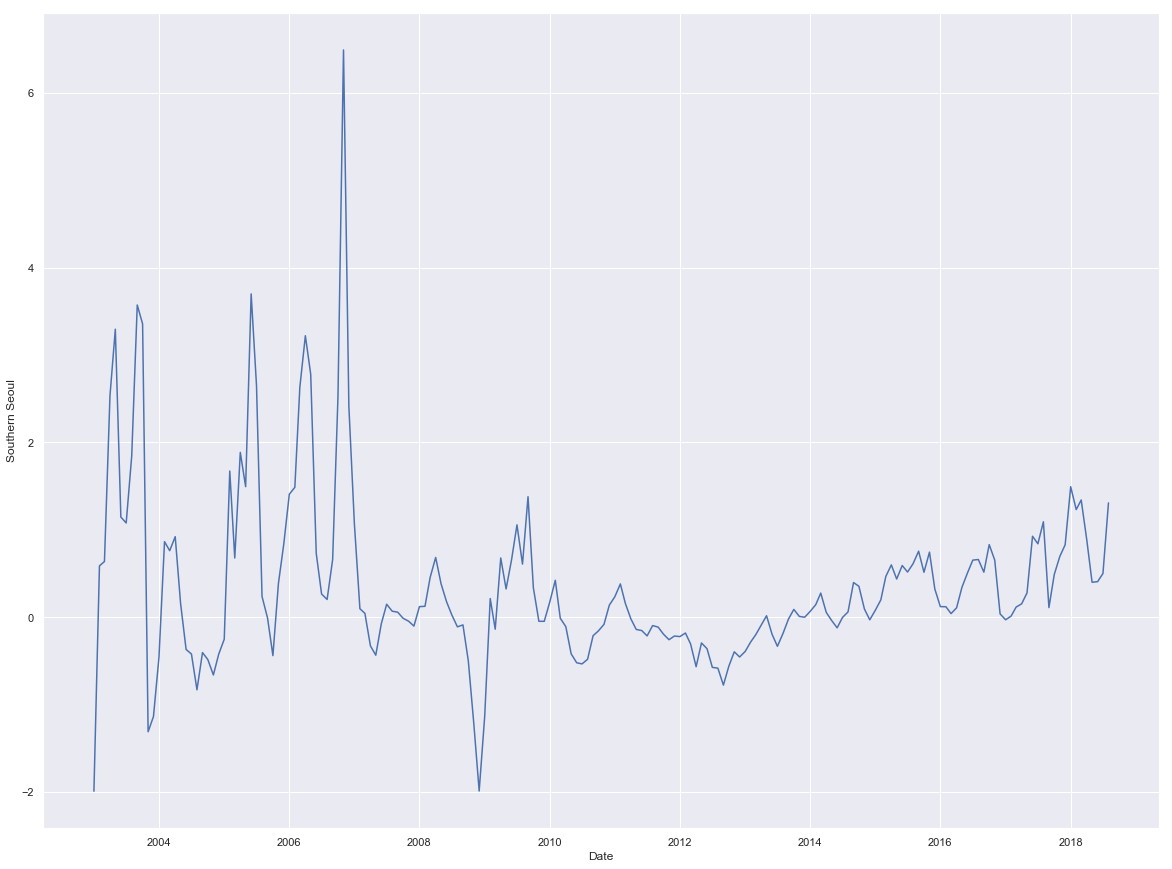

In [457]:
plt.subplots(figsize=(20,15))
sns.lineplot(x="Date", y=name, data=fin_data)

In [458]:
d = pd.date_range(start='1/1/2003', end='8/1/2018', freq='MS')    
print(d)

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', length=188, freq='MS')


In [463]:
def find_many_vals(lists):
    result = [find_val_using_key(loc_code_dict, i) for i in lists]
    return result

In [482]:
def input_all():
    inputs = input('도시를 적으세여: ')
    inputs = inputs.replace(' ', '')

    str_to_lists = inputs.split(',')
    input_lists = [a for a in str_to_lists]
    
    return input_lists

In [483]:
strs = input_all()

도시를 적으세여: 강남구, 송파구


In [484]:
find_many_vals(strs)

['Gangnam-gu', 'Songpa-gu']

In [485]:
wanna_find = find_many_vals(input_all())

도시를 적으세여: 강남구, 송파구, 서초구, 강남


In [486]:
cal_date = np.array(fin_data[wanna_find])
cal_date

array([[-3.87637507e+00, -3.61445783e+00, -2.25248821e+00,
        -1.99057098e+00],
       [ 2.28882834e+00,  2.01086957e+00,  8.03858521e-01,
         5.87920898e-01],
       [ 1.59829515e+00,  1.59829515e-01,  1.06326422e-01,
         6.37619554e-01],
       [ 4.14263241e+00,  4.84042553e+00,  1.75252257e+00,
         2.53431890e+00],
       [ 4.07854985e+00,  5.02283105e+00,  3.60125261e+00,
         3.29557158e+00],
       [ 8.70827286e-01,  1.35265700e+00,  1.41057935e+00,
         1.14656032e+00],
       [ 2.43516688e+00,  8.92691863e-01,  1.78648499e+00,
         1.07879419e+00],
       [ 2.90708117e+00,  1.76477294e+00,  2.20891313e+00,
         1.84578080e+00],
       [ 5.02218059e+00,  5.76449511e+00,  2.98761624e+00,
         3.57267686e+00],
       [ 5.30680989e+00,  5.72725319e+00,  3.17127017e+00,
         3.35625401e+00],
       [-2.76381443e+00, -1.67937024e+00, -1.58818023e+00,
        -1.31002046e+00],
       [-1.45723594e+00, -1.44070665e+00, -1.40033626e+00,
      

In [487]:
wide_df = pd.DataFrame(cal_date, d, wanna_find)

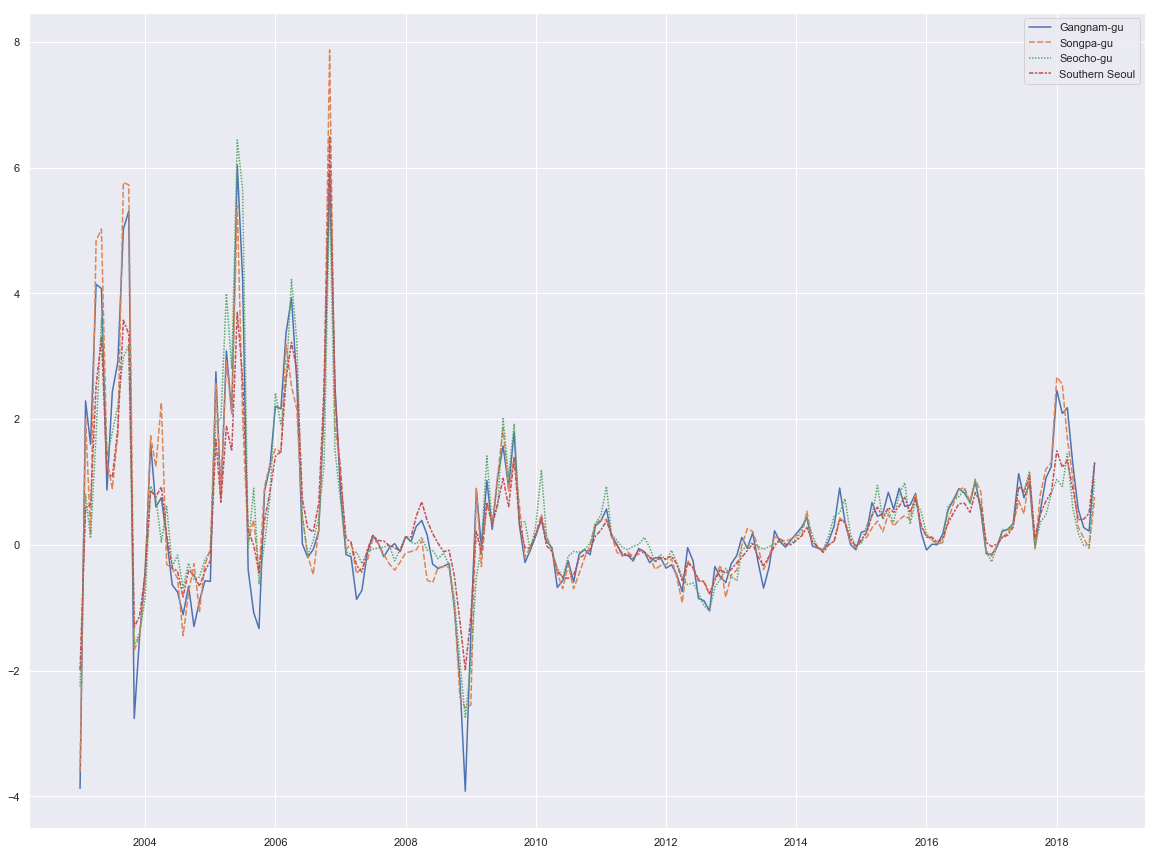

In [488]:
plt.subplots(figsize=(20,15))
ax = sns.lineplot(data=wide_df)